In [76]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt
import keyboard

definitions

In [77]:



def load_image_storage(image):
    global img 
    img = cv2.imread(image)#loads the picture into variable 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model 
    global img_height
    global img_width
    global img_channels
    img_height,img_width,img_channels = img.shape# gets some info from given picture
    print('width',img_width,'Px')#width
    print('height',img_height,'Px')#height 
    print('channels',img_channels)#colour channels

def load_image_camera(cam_id):
    global img
    cap = cv2.VideoCapture(cam_id)#inicialize camera 
    cap.set(3,640)#img width
    cap.set(4,480)#img height
    sucess, img = cap.read()#reads frame from camera
    global img_height
    global img_width
    global img_channels 
    img_height,img_width,img_channels = img.shape# gets some info 
    print('width',img_width,'Px')#width
    print('height',img_height,'Px')#height 
    print('channels',img_channels)#colour channels

def vizualize_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))# konverts bgr to rgb

def get_data(image,model):
    class_names =[]
    class_names.append('teddy bear')
    global objects_centers
    global objects_ids
    global distances
    objects_ids = []#list for ids of found objects 
    objects_centers = []#list for objects centers 
    distances = []
    results = model(image)#applies model on the image 
    for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])
            if cls ==0:
                print(cls)
                x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
                x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
                print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci  
                center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
                center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
                center = center_x,center_y
                print('center:',center_x,center_y)#vypise udaje 
                cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
                conf = box.conf[0]#jistota modelu 
                conf = float(conf*100)
                rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
                print('confidence:',rounded_conf)
                #box on bounding box s nazvem claasy a confidence modelu
                cvzone.putTextRect(img, f'{class_names[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
                #objects_ids.append(cls)#zapisovani hodnot do listu
                objects_centers.append(center)#zapisovani hodnot do listu
                distance = img_height-y1-y2
                print(distance)
                distances.append(distance)
    cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,0),thickness=2 )#vykresli na video primku stredem videa        


loadings

In [78]:
model = YOLO('bearbest.pt')#loads the model 

main

width 613 Px
height 273 Px
channels 3



0: 288x640 1 tedy bear, 302.4ms
Speed: 4.0ms preprocess, 302.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)


0
X= 317 Y= 35 W= 392 H= 123
center: 354 79
confidence: 93
115


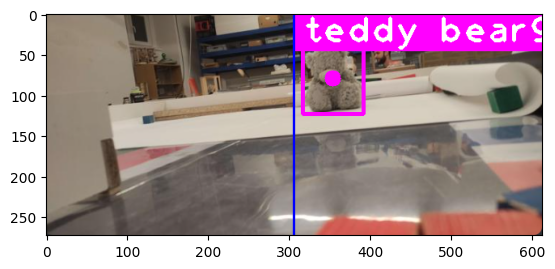

In [79]:
load_image_storage('test1.png')
get_data(img,model)
vizualize_image(img)